In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
import pandas as pd
import cv2
from skimage.transform import resize
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten,BatchNormalization
from keras.utils import to_categorical

import os
print(os.listdir('../input'))
from tqdm import tqdm
from keras.utils import to_categorical
import cv2
# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['dog-breed-identification', 'vgg16w']


In [4]:
labels=pd.read_csv('../input/dog-breed-identification/labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
x_train_feature = []
y_train_feature = []

for f, img in tqdm(labels.values):
    train_img = cv2.imread('../input/dog-breed-identification/train/{}.jpg'.format(f),1)
    train_img_resize = cv2.resize(train_img, (128, 128))
    x_train_feature.append(train_img_resize)
    y_train_feature.append(img)

100%|██████████| 10222/10222 [00:49<00:00, 206.45it/s]


In [8]:
Le=LabelEncoder().fit(labels['breed'])
label_encoder=Le.fit_transform(labels['breed'])
label_encoder

array([19, 37, 85, ...,  3, 75, 28])

In [9]:
y=to_categorical(label_encoder,num_classes=120)

In [10]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

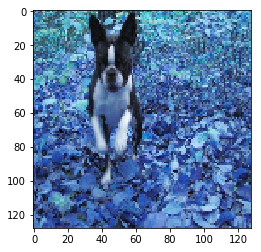

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train_feature[0])

In [12]:
X=np.array(x_train_feature)

In [13]:
X.shape

(10222, 128, 128, 3)

In [14]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.20,random_state=1)


In [ ]:
model=Sequential()
model.add(Conv2D(64,(5,5),input_shape=(128,128,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(120,activation='relu'))

model.compile('Adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

In [ ]:
model.fit(Xtrain,Ytrain,epochs=10,batch_size=128, validation_data=(Xtest,Ytest))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=50,  
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    horizontal_flip=False,  
    vertical_flip=False)

train_datagen.fit(Xtrain)

In [ ]:
train_generator = train_datagen.flow(Xtrain, Ytrain,  batch_size=128, shuffle=True)
model.fit_generator(
    train_generator,
    steps_per_epoch=Xtrain.shape[0] / 128,
    epochs=10,
)


In [15]:
os.chdir('/kaggle/input/vgg16w')
os.listdir()

['vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5']

In [16]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
#base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
base_model= VGG16(weights=("/kaggle/input/vgg16w/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"),
                 include_top=False, pooling='avg', input_shape=(128,128,3))

In [17]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

In [24]:
x = base_model.output
#x = Flatten()(x)
x = Dense(1024, activation="relu", name='dense_1')(x)
x = Dense(256, activation="relu", name='dense_2')(x)
predictions = Dense(120, activation="softmax")(x)

In [25]:

for layer in base_model.layers:
  if('dense' not in layer.name):
    layer.trainable = False


In [26]:
model_final = Model(input = base_model.input, output=predictions)

# Compile the model
model_final.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [29]:
model_final.fit(Xtrain, Ytrain, epochs = 10, batch_size=500,validation_data = (Xtest, Ytest))

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 13s 2ms/step - loss: 0.2122 - acc: 0.9376 - val_loss: 3.5197 - val_acc: 0.3980
Epoch 2/10
8177/8177 [==============================] - 9s 1ms/step - loss: 0.1060 - acc: 0.9803 - val_loss: 3.4587 - val_acc: 0.4093
Epoch 3/10
8177/8177 [==============================] - 9s 1ms/step - loss: 0.0617 - acc: 0.9927 - val_loss: 3.4985 - val_acc: 0.4064
Epoch 4/10
8177/8177 [==============================] - 9s 1ms/step - loss: 0.0465 - acc: 0.9961 - val_loss: 3.5448 - val_acc: 0.4088
Epoch 5/10
8177/8177 [==============================] - 9s 1ms/step - loss: 0.0383 - acc: 0.9980 - val_loss: 3.5854 - val_acc: 0.4059
Epoch 6/10
8177/8177 [==============================] - 9s 1ms/step - loss: 0.0330 - acc: 0.9989 - val_loss: 3.6233 - val_acc: 0.4059
Epoch 7/10
8177/8177 [==============================] - 9s 1ms/step - loss: 0.0291 - acc: 0.9991 - val_loss: 3.6583 - val_acc: 0.4068
Epoch 8/10
81

In [30]:
test=pd.read_csv('/kaggle/input/dog-breed-identification/sample_submission.csv')
test.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [ ]:
xtest=[]
ids=test['id']
for i in tqdm(ids):
#       print('//kaggle/input/dog-breed-identification/test/{}.jpg'.format(i))
        img=cv2.imread('/kaggle/input/dog-breed-identification/test/{}.jpg'.format(i))
        img_resige=cv2.resize(img,(128,128))
        xtest.append(img_resige)
    

In [ ]:
preds=model_final.predict(np.array(xtest))

In [ ]:
len(preds)

In [ ]:
df=pd.DataFrame(preds)
df['id']=test['id']


In [ ]:
submission=pd.read_csv('/kaggle/input/dog-breed-identification/sample_submission.csv')
# Substitute the dummy predictions in submmission by the model predictions
submission.loc[:,1:] = preds
submission.head()
submit_df=submission

In [ ]:
os.getcwd()

In [ ]:
from IPython.display import FileLink, FileLinks

submit_df.to_csv('submission.csv', index=False)
FileLink('submission.csv')